In [2]:
import math
import numpy as np
from sklearn import datasets, model_selection, neighbors, metrics
import operator
from scipy import sparse
from collections import Counter
from matplotlib import pylab

In [3]:
def get_Euclidian_distance(a_data, b_data):
    pairs_of_data = zip(a_data, b_data)
    sum_of_dist = np.sum([pow(a-b, 2) for (a,b) in pairs_of_data])
    return math.sqrt(sum_of_dist)

In [4]:
a_data = [2, 2]
b_data = [1, 1]

print(get_Euclidian_distance(a_data, b_data))

1.4142135623730951


In [5]:
#вычисляем расстояния

In [6]:
def get_neighbours(test_point, training_set):
    distances_to_neighbours = [_get_distance(train = train_point, test = test_point) for train_point in training_set]
    return distances_to_neighbours
    
def _get_distance(train, test):
    dist = get_Euclidian_distance(train, test)
    return (train, dist)

In [7]:
train_set = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
test_point = [5, 5, 5]
result = get_neighbours(test_point, train_set)
print(result)

[([2, 2, 2, 'a'], 5.196152422706632), ([4, 4, 4, 'b'], 1.7320508075688772)]


In [8]:
#выбираем ближайших соседей

In [9]:
def closest_k_neighbours(test_point, train_set, k):
    distances_to_neighbours = get_neighbours(test_point, train_set)
    res = sorted(distances_to_neighbours, key=operator.itemgetter(1))
    return(res[:k])

In [10]:
result = closest_k_neighbours(test_point, train_set, k=1)
print(result)

[([4, 4, 4, 'b'], 1.7320508075688772)]


In [11]:
#получаем классификацию

In [12]:
def get_predictions(neighbours):
    class_votes={}
    print(neighbours)
    for i in range(len(neighbours)):
        vote = neighbours[i][0][-1]
        if vote in class_votes.keys():
            class_votes[vote] +=1
        else:
            class_votes[vote] = 1
    result = sorted(class_votes, key=itemgetter(1), reverse=True)
    return(result[0][0])

In [13]:
def get_predictions_2(neighbours):
    classes = [neighbour[0][-1] for neighbour in neighbours]
    count_classes = Counter(classes)
    return count_classes.most_common()[0][0] 

In [14]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b'], [3, 3, 3, 'b'], [0, 1, 0, 'a']]
testSet = [[5, 5, 5], [1, 0, 1]]
for i in testSet:
    neighbs = closest_k_neighbours(i, trainSet, k=3)
    result = get_predictions_2(neighbs)
    print('prediction: '+ result)

prediction: b
prediction: a


In [15]:
#выгружаем данные

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.3)

In [52]:
#тестим sklearn

In [53]:
sklearn_knn = neighbors.KNeighborsClassifier(n_neighbors=8)
sklearn_knn.fit(X_train, y_train)
sklearn_result = sklearn_knn.predict(X_test)
metrics.accuracy_score(y_test, sklearn_result)

0.9777777777777777

In [54]:
#собираем собственный класс и тестируем его

In [55]:
#Собираем в один класс:
class my_knn:
    def __init__(self, k):
        self.k = k
        
    def fit(self, train_set):
        self.train_set = train_set
        
    def predict(self, test_set):
        test_results = []
        for i in test_set:
            neighbs = closest_k_neighbours(i, self.train_set, k=self.k)
            result = get_predictions_2(neighbs)
            test_results.append(result)
        return test_results

In [56]:
y = y_test.reshape((45, 1))
train_set = np.append(X_test, y, axis=1)

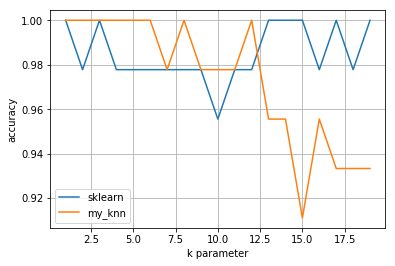

In [57]:
sklearn_results = []
my_knn_results = []

index_array = [i for i in range(1, 20, 1)]

for i in index_array:
    sklearn_knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    sklearn_res = sklearn_knn.predict(X_test)
    sklearn_acc = metrics.accuracy_score(y_test, sklearn_res)
    sklearn_results.append(sklearn_acc)
    
    my_knn_cl = my_knn(i)
    my_knn_cl.fit(train_set)
    my_knn_res = my_knn_cl.predict(X_test)
    my_knn_acc = metrics.accuracy_score(y_test, my_knn_res)
    my_knn_results.append(my_knn_acc)

pylab.grid(True)
pylab.plot(index_array, sklearn_results, label='sklearn')
pylab.plot(index_array, my_knn_results, label='my_knn') 
pylab.xlabel('k parameter')
pylab.ylabel('accuracy')
pylab.legend()